In [31]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, cohen_kappa_score, recall_score, precision_score

In [32]:
# Ler o arquivo CSV com as colunas na primeira linha
df = pd.read_csv('../data/diabetes_prediction_weka.csv')

In [33]:
df = df.drop('gender', axis=1)
df = df.drop('smoking_history', axis=1)

In [34]:
# Separar as características (features) e a classe (label)
X = df.iloc[:, :-1].values  # Todas as colunas exceto a última
y = df.iloc[:, -1].values   # Última coluna

In [35]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Redimensionar os dados para o formato esperado pelo LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [38]:
# Construir o modelo LSTM
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

c:\Users\joao\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
# Treinar o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


4200/4200 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8732 - loss: 0.2963 - val_accuracy: 0.8987 - val_loss: 0.2206
Epoch 2/100
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8980 - loss: 0.2171 - val_accuracy: 0.9045 - val_loss: 0.1986
Epoch 3/100
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9041 - loss: 0.1992 - val_accuracy: 0.9088 - val_loss: 0.1857
Epoch 4/100
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9073 - loss: 0.1882 - val_accuracy: 0.9127 - val_loss: 0.1777
Epoch 5/100
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9108 - loss: 0.1817 - val_accuracy: 0.9127 - val_loss: 0.1754
Epoch 6/100
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9107 - loss: 0.1802 - val_accuracy: 0.9139 - val_loss: 0.1716
Epoch 7/100
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9107 - loss: 0.1779 - val_accuracy: 0.9137 - val_loss: 0.1711
Epoch 8/100
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9121 - loss: 0.1765 - val

In [41]:
# Fazer previsões
predictions = model.predict(X_test).round()

 395/1050 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step


In [42]:
# Avaliação do modelo
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     18112
           1       0.93      0.90      0.92     15488

    accuracy                           0.93     33600
   macro avg       0.93      0.92      0.92     33600
weighted avg       0.93      0.93      0.93     33600

Accuracy: 0.9251488095238095


In [43]:
# Matriz de confusão e Índice Kappa
conf_matrix = confusion_matrix(y_test, predictions)
kappa_score = cohen_kappa_score(y_test, predictions)

In [44]:
print("Matriz de Confusão:")
print(conf_matrix)
print("Índice Kappa:", kappa_score)

Matriz de Confusão:
[[17115   997]
 [ 1518 13970]]
Índice Kappa: 0.8490110804683032


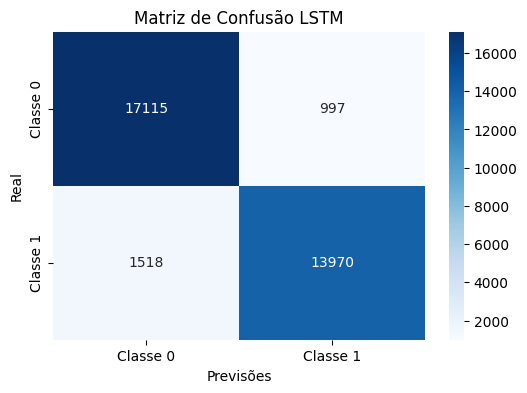

In [45]:
# Criar um plot da matriz de confusão usando seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsões')
plt.ylabel('Real')
plt.title('Matriz de Confusão LSTM')
plt.show()

Aplicando outras métricas

1 - Precisão

In [46]:
precision = precision_score (y_test , predictions)
print("Precisão:", precision)

Precisão: 0.9333867842587025


2 - Sensibilidade

In [47]:
sensitivity = recall_score(y_test, predictions)
print("Sensibilidade:", sensitivity)

Sensibilidade: 0.9019886363636364


3 - Especificidade

In [48]:
#true negatives
TN = conf_matrix[0][0]
#false positives
FP = conf_matrix[0][1]

specificity = TN/(TN+FP)
print("Especificidade:", specificity)

Especificidade: 0.9449536219081273
